In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os import path

DATA_DIR = r'../Data/'


In [65]:
df = pd.read_csv(path.join(DATA_DIR,'Game by Game Breakdown_2019_2019.csv'))
df_adv = pd.read_csv(path.join(DATA_DIR,'Advanced Stats Game by Game Breakdown_2018_2019.csv'))

df = df.loc[df['year'] == 2019]
df_adv = df_adv.loc[df_adv['year'] == 2019]

In [66]:
standard_col = ['player_id', 'player_name', 'pos','Date', 'year']

passing_col = ['Passing_Cmp', 'Passing_Att', 'Passing_Yds', 'Passing_TD', 'Passing_Int', 
               'Passing_Rate', 'Passing_Sk', 'Passing_Y/A', 'Passing_AY/A']

passing_col_adv = ['Passing_1D', 'Passing_IAY', 'Passing_CAY', 'Passing_YAC', 'Passing_Drops', 'Passing_BadTh', #advanced
                   'Passing_Bltz', 'Passing_Hrry', 'Passing_Hits', 'Passing_Scrm'] #advanced
rush_col = ['Rushing_Att', 'Rushing_Yds', 'Rushing_Y/A', 'Rushing_TD']

rush_col_adv = ['Rushing_1D', 'Rushing_YBC', 'Rushing_YAC', 'Rushing_BrkTkl'] #advanced

rec_col = ['Receiving_Tgt', 'Receiving_Rec', 'Receiving_Yds', 'Receiving_Y/R', 'Receiving_TD', 'Receiving_Y/Tgt']

rec_col_adv = ['Receiving_1D', 'Receiving_YBC', 'Receiving_YAC', 'Receiving_BrkTkl', 'Receiving_Drop'] #advanced

fumb_col = ['Fumbles', 'Fumbles_Lost']    #fumble columns

numeric_col = passing_col + passing_col_adv + rush_col + rush_col_adv + rec_col + rec_col_adv + fumb_col

In [67]:
df.head()

,player_id,player_name,pos,year,Date,Week,Age,Tm,Home/Away,Opp,...,Receiving_Tgt,Receiving_Rec,Receiving_Yds,Receiving_Y/R,Receiving_TD,Receiving_Ctch%,Receiving_Y/Tgt,Scoring_2PM,Fumbles,Fumbles_Lost
0,McCaCh01,Christian McCaffrey,RB,2019,2019-09-08,1.0,23.093,CAR,Home,LAR,...,11.0,10.0,81.0,8.10,0.0,90.9%,7.36,0.0,0.0,0.0
1,McCaCh01,Christian McCaffrey,RB,2019,2019-09-12,2.0,23.097,CAR,Home,TAM,...,6.0,2.0,16.0,8.00,0.0,33.3%,2.67,0.0,0.0,0.0
2,McCaCh01,Christian McCaffrey,RB,2019,2019-09-22,3.0,23.107,CAR,Away,ARI,...,4.0,3.0,35.0,11.67,0.0,75.0%,8.75,0.0,0.0,0.0
3,McCaCh01,Christian McCaffrey,RB,2019,2019-09-29,4.0,23.114,CAR,Away,HOU,...,10.0,10.0,86.0,8.60,0.0,100.0%,8.60,0.0,0.0,0.0
4,McCaCh01,Christian McCaffrey,RB,2019,2019-10-06,5.0,23.121,CAR,Home,JAX,...,8.0,6.0,61.0,10.17,1.0,75.0%,7.63,0.0,0.0,0.0


In [68]:
df_adv.head()

,player_id,player_name,pos,Date,year,Rushing_1D,Rushing_YBC,Rushing_YAC,Rushing_BrkTkl,Receiving_1D,...,Passing_1D,Passing_IAY,Passing_CAY,Passing_YAC,Passing_Drops,Passing_BadTh,Passing_Bltz,Passing_Hrry,Passing_Hits,Passing_Scrm
4005,McCaCh01,Christian McCaffrey,RB,2019-09-08,2019,7.0,60.0,68.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4006,McCaCh01,Christian McCaffrey,RB,2019-09-12,2019,2.0,10.0,27.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4007,McCaCh01,Christian McCaffrey,RB,2019-09-22,2019,3.0,78.0,75.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4008,McCaCh01,Christian McCaffrey,RB,2019-09-29,2019,3.0,37.0,56.0,1.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4009,McCaCh01,Christian McCaffrey,RB,2019-10-06,2019,6.0,134.0,42.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [69]:
new_df = df.merge(df_adv, on=['player_id', 'Date'])

new_df.drop(columns=['player_name_y', 'pos_y', 'year_y'], inplace=True)
new_df.rename(columns={
    'player_name_x' : 'player_name',
    'pos_x' : 'pos',
    'year_x': 'year'
}, inplace=True)

In [71]:
new_df.drop(columns='Receiving_Ctch%', inplace=True)

In [72]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4026 entries, 0 to 4025
Data columns (total 54 columns):
player_id           4026 non-null object
player_name         4026 non-null object
pos                 4026 non-null object
year                4026 non-null int64
Date                4026 non-null object
Week                4026 non-null float64
Age                 4026 non-null float64
Tm                  4026 non-null object
Home/Away           4026 non-null object
Opp                 4026 non-null object
Result              4026 non-null object
Passing_Cmp         4026 non-null float64
Passing_Att         4026 non-null float64
Passing_Cmp%        4026 non-null float64
Passing_Yds         4026 non-null float64
Passing_TD          4026 non-null float64
Passing_Int         4026 non-null float64
Passing_Rate        4026 non-null float64
Passing_Sk          4026 non-null float64
Passing_Y/A         4026 non-null float64
Passing_AY/A        4026 non-null float64
Rushing_Att         4

In [62]:
new_df.drop(columns='Receiving_TD', inplace=True)

In [73]:
new_df['std_scoring'] = (0.1*(new_df['Rushing_Yds'] + new_df['Receiving_Yds']) + 0.04*new_df['Passing_Yds']
                         + -3*(new_df['Fumbles'] + new_df['Passing_Int']) +
                         6*(new_df['Passing_TD'] + new_df['Rushing_TD'] + new_df['Receiving_TD']))

new_df['ppr_scoring'] = new_df['std_scoring'] + 1*new_df['Receiving_Rec']

new_df['half_ppr_scoring'] = new_df['std_scoring'] + 0.5*new_df['Receiving_Rec']                        

In [34]:
new_df.loc[new_df['player_id'] == 'McCaCh01',standard_col + rec_col_adv]

,player_id,player_name,pos,Date,year,Receiving_1D,Receiving_YBC,Receiving_YAC,Receiving_BrkTkl,Receiving_Drop,Receiving_Drop%
0,McCaCh01,Christian McCaffrey,RB,2019-09-08,2019,3.0,26.0,55.0,1.0,0.0,0.0
1,McCaCh01,Christian McCaffrey,RB,2019-09-12,2019,2.0,-1.0,17.0,0.0,0.0,0.0
2,McCaCh01,Christian McCaffrey,RB,2019-09-22,2019,2.0,5.0,30.0,0.0,0.0,0.0
3,McCaCh01,Christian McCaffrey,RB,2019-09-29,2019,6.0,-13.0,99.0,2.0,0.0,0.0
4,McCaCh01,Christian McCaffrey,RB,2019-10-06,2019,4.0,-7.0,68.0,0.0,0.0,0.0
5,McCaCh01,Christian McCaffrey,RB,2019-10-13,2019,1.0,-11.0,37.0,1.0,0.0,0.0
6,McCaCh01,Christian McCaffrey,RB,2019-10-27,2019,1.0,10.0,28.0,0.0,1.0,20.0
7,McCaCh01,Christian McCaffrey,RB,2019-11-03,2019,3.0,6.0,14.0,0.0,0.0,0.0
8,McCaCh01,Christian McCaffrey,RB,2019-11-10,2019,3.0,-10.0,43.0,0.0,0.0,0.0
9,McCaCh01,Christian McCaffrey,RB,2019-11-17,2019,5.0,29.0,92.0,2.0,1.0,6.7


In [135]:
new_df.loc[new_df['player_id'] == 'McCaCh01', ['std_scoring', 'ppr_scoring']].std()

std_scoring     9.473181
ppr_scoring    10.078418
dtype: float64

In [93]:
new_df.loc[new_df['pos'] == 'RB', ['player_name', 'std_scoring', 'ppr_scoring', 'half_ppr_scoring']].groupby('player_name').sum().sort_values('ppr_scoring', ascending=False).head(10).reset_index()

,player_name,std_scoring,ppr_scoring,half_ppr_scoring
0,Christian McCaffrey,350.20,466.20,408.20
1,Aaron Jones,260.80,309.80,285.30
2,Ezekiel Elliott,252.70,306.70,279.70
3,Austin Ekeler,212.00,304.00,258.00
4,Derrick Henry,267.60,285.60,276.60
5,Dalvin Cook,231.40,284.40,257.90
6,Leonard Fournette,182.40,258.40,220.40
7,Nick Chubb,216.20,252.20,234.20
8,Saquon Barkley,189.10,241.10,215.10
9,Alvin Kamara,157.52,238.52,198.02


In [113]:
df_rb = new_df.loc[new_df['pos'] == 'RB', ['player_name', 'ppr_scoring']].groupby('player_name').sum().sort_values('ppr_scoring', ascending=False)

In [132]:
df_rb.describe()

,ppr_scoring
count,80.000000
mean,136.505250
std,83.907129
min,27.700000
25%,67.100000
50%,117.750000
75%,191.100000
max,466.200000


In [140]:
new_df = new_df.loc[new_df['pos'].isin(['QB', 'RB', 'WR', 'TE'])]

In [141]:
new_df['pos'].value_counts()

WR    1724
RB    1094
TE     627
QB     540
Name: pos, dtype: int64

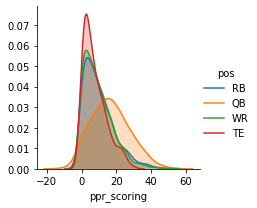

In [145]:
g = (sns.FacetGrid(new_df, hue='pos').map(sns.kdeplot, 'ppr_scoring', shade=True)).add_legend()

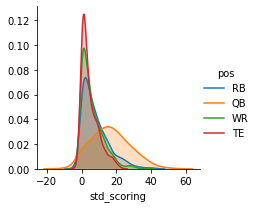

In [146]:
g = (sns.FacetGrid(new_df, hue='pos').map(sns.kdeplot, 'std_scoring', shade=True)).add_legend()

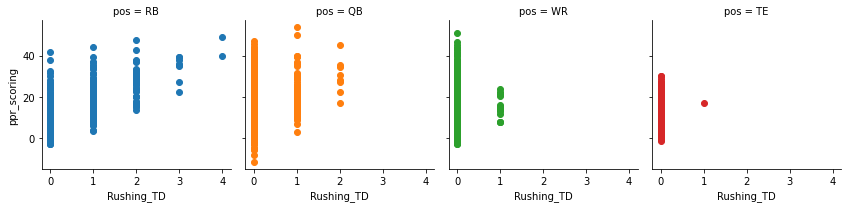

In [143]:
g = sns.FacetGrid(new_df, col='pos', aspect=1, hue='pos')
g=g.map(plt.scatter, 'Rushing_TD', 'ppr_scoring')

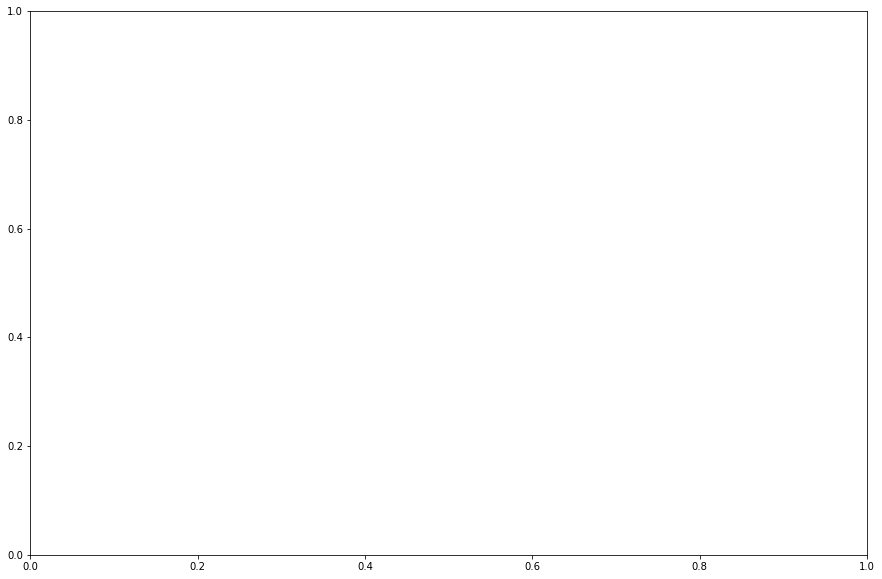

In [137]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

In [147]:
new_df['year'].min()

2019